##### There is a long history of lending discrimination based on race in the United States. Lenders have literally drawn red lines on a map around certain neighbourhoods where they would not offer loans, based on the racial demographics of those neighbourhoods (read more about redlining here: https://en.wikipedia.org/wiki/Redlining). In 1975, congress passed the Home Mortgage Disclosure Act (HDMA) to bring more transparency to this injustice (https://en.wikipedia.org/wiki/Home_Mortgage_Disclosure_Act). The idea is that banks must report details about loan applications and which loans they decided to approve.

##### The public HDMA dataset spans all the states and many years, and is documented here:

https://www.ffiec.gov/hmda/pdf/2020guide.pdf
https://cfpb.github.io/hmda-platform/#hmda-api-documentation
##### In this project, we'll analyze every loan application made in Wisconsin in 2020.

##### 在美国，基于种族的贷款歧视由来已久。贷款人根据这些社区的种族人口统计数据，在他们不会提供贷款的某些社区周围的地图上画了红线（在此处阅读有关红线的更多信息：https ://en.wikipedia.org/wiki/Redlining ）。1975 年，国会通过了住房抵押贷款披露法案 (HDMA)，以提高这种不公正现象的透明度 ( https://en.wikipedia.org/wiki/Home_Mortgage_Disclosure_Act )。这个想法是银行必须报告有关贷款申请的详细信息以及他们决定批准哪些贷款。

##### 公共 HDMA 数据集跨越所有州和多年，并在此处记录：

https://www.ffiec.gov/hmda/pdf/2020guide.pdf
https://cfpb.github.io/hmda-platform/#hmda-api-documentation
##### 在此项目中，我们将分析 2020 年在威斯康星州提出的每份贷款申请。

##### 会包括：
###### classes
###### large dataset
###### trees
###### testing
###### modeles

In [1]:
import loans
import search

In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
bank_target=loans.Bank('First Home Bank')

##### Average Interest Rate for the Bank

In [28]:
total_interest=0
bank_count=0
for x in bank_target:
    if x.interest_rate ==-1:
        pass
    else:
        total_interest += x.interest_rate
        bank_count += 1
total_interest/bank_count

2.962962962962963

##### How many applicants are there per loan, on average?

In [29]:
applicants_count = 0
loans_count = 0
for x in bank_target:
    applicants_count += len(x.applicants)
    loans_count += 1
applicants_count/loans_count

1.5777777777777777

##### What is the distribution of ages

In [30]:
age=dict()
for x in bank_target:
    for i in x.applicants:
        age[i.age] = age.get(i.age, 0) + 1
age

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

##### How many interest rate values are missing? (Binary search tree)

In [34]:
tree=search.BST()
for i in bank_target.list_values:
    tree.add(i.interest_rate, i)
tree.__getitem__(-1) # missing rate is -1

[<Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $95000.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $315000.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>,
 <Loan: -1.0% on $-1.0 with 1 applicant(s)>]

##### How tall is the tree

In [35]:
def height(node):
    if node is None:
        return 0
    lefAns = height(node.left)
    rigtAns = height(node.right)
    return max(lefAns, rigtAns)+1
height(tree.root)

9

##### how long does it takes to add the loans to the tree?

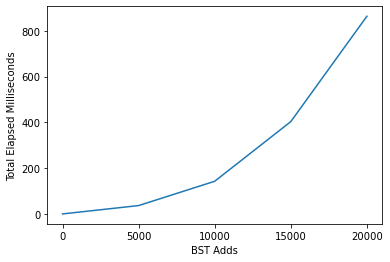

In [95]:
import time
from matplotlib import  pyplot as plt
import numpy as np
bank_target2=loans.Bank('University of Wisconsin Credit Union')
tree=search.BST()
iter_rows = []
time0 = time.time()
nums = [0, 5000, 10000, 15000, 20000]
for i in bank_target2.list_values:
    tree.add(i.interest_rate, i)
    time1 = time.time()
    iter_rows.append(time1-time0)
iter_time=[0]
for x in nums[1:]:
    iter_time.append(sum(iter_rows[0:x]))
#for i in range(len(times)-1):
#    elapse_time = iter_time[i+1] - iter_time[i]
#    elapsed_time.append(elapse_time)

#time_elapsed=pd.DataFrame()
#for x in range(len(times)):
#    time_elapsed.at[x*5000 , 'iterrows'] = elapsed_time
#time_elapsed.plot.line()
plt.plot(nums, iter_time)
plt.xlabel('BST Adds')
plt.ylabel('Total Elapsed Milliseconds')
plt.xticks(np.linspace(0, 20000, 5))
plt.show()

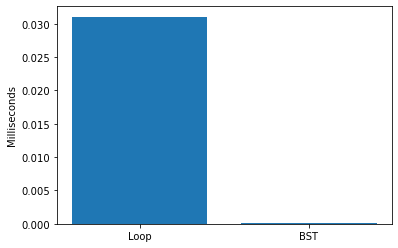

In [96]:
# BST
time2=time.time()
number= len(tree[-1])
time3=time.time()
time_elapse_BST=time3-time2

# For Loop
time4=time.time()
count = 0
for x in bank_target2.list_values:
    if x.interest_rate == "-1.0":
        count += 1
time5=time.time()
time_elapse_loop = time5-time4
x_axis=["Loop", "BST"]
y_axis=[time_elapse_loop, time_elapse_BST]
plt.bar(x_axis, y_axis)
plt.ylabel('Milliseconds')
plt.show()

##### How many applicants indicate multiple racial identities?

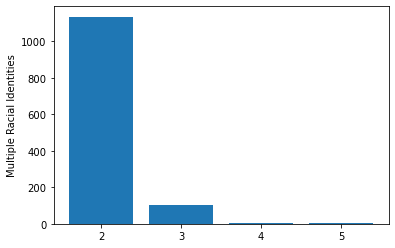

In [97]:
list_race=[]
for x in bank_target2:
    for person in x.applicants:
        race_info = list(person.race)
        list_race.append(len(race_info))
multi_races=[x for x in list(set(list_race)) if x>=2]
frequency = dict()
for i in list_race:
    frequency[i] = frequency.get(i, 0) + 1
races_frequency=dict()
for num in multi_races:
    races_frequency[num] = frequency[num]
plt.bar(races_frequency.keys(), races_frequency.values())
plt.ylabel('Multiple Racial Identities')
plt.xticks(multi_races)
plt.show()

##### How many leaf nodes are in the tree?

In [98]:
def getleafcount(node):
    if node ==None:
        return 0
    if node.left==None and node.right==None:
        return 1
    return getleafcount(node.left) +getleafcount(node.right)
getleafcount(tree.root) # First Home Bank

9

##### Find the second largest interest rate in the Bank BST

In [100]:
def second_largest_rates(node):
    if node==None:
        return []
    if node.left==None and node.right == None:
        return [node.key]
    second_num =sorted([node.key] + second_largest_rates(node.left) + second_largest_rates(node.right))[-2:]
    return second_num
second_largest_rates(tree.root)[0]

6.99